In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import seaborn as sn
from collections import Counter 
from sklearn.linear_model import LinearRegression
import scipy.stats as st


In [2]:
#These are the 5 sets of raw data that we have.

file = "csv_data/2015.csv"
file1 = "csv_data/2016.csv"
file2 = "csv_data/2017.csv"
file3 = "csv_data/2018.csv"
file4 = "csv_data/2019.csv"

In [3]:
# Dataframes by year.

df_2015 = pd.read_csv(file)
df_2016 = pd.read_csv(file1)
df_2017 = pd.read_csv(file2)
df_2018 = pd.read_csv(file3)
df_2019 = pd.read_csv(file4)

In [4]:
# Here we started the process of checking what our csvs looked like.
#We were interested in the # of rows and columns in each csv file. 

print("2015: ", df_2015.shape)
print("2016: ", df_2016.shape)
print("2017: ", df_2017.shape)
print("2018: ", df_2018.shape)
print("2019: ", df_2019.shape)

2015:  (158, 12)
2016:  (157, 13)
2017:  (155, 12)
2018:  (156, 9)
2019:  (156, 9)


In [5]:
# Next, we checked for any empty values in each individual year. Here we can see that 2015 did not have any empty values. 
df_2015.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [6]:
# After looking at the components of each year, we noticed the column names varied, so we decided to rename and drop columns
# so that all the years matched. 
df_2015.rename(columns={'Happiness Rank':'rank', 'Happiness Score':'score', 'Economy (GDP per Capita)': 'gdp',
                      'Health (Life Expectancy)': 'health', 'Trust (Government Corruption)': 'corruption',
                      "Dystopia Residual": "dystopia"},
                        inplace = True)
df_2015.columns = df_2015.columns.str.lower()
df_2015.columns

Index(['country', 'region', 'rank', 'score', 'standard error', 'gdp', 'family',
       'health', 'freedom', 'corruption', 'generosity', 'dystopia'],
      dtype='object')

In [7]:
df_2015.drop(columns = ['region', 'standard error'], inplace = True)
df_2015.sample(5)

,country,rank,score,gdp,family,health,freedom,corruption,generosity,dystopia
120,Nepal,121,4.514,0.35997,0.86449,0.56874,0.38282,0.05907,0.32296,1.95637
113,Ghana,114,4.633,0.54558,0.67954,0.40132,0.42342,0.04355,0.23087,2.30919
144,Cambodia,145,3.819,0.46038,0.62736,0.61114,0.66246,0.07247,0.40359,0.98195
154,Benin,155,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
157,Togo,158,2.839,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [8]:
df_2016.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [9]:
df_2016.columns = df_2016.columns.str.lower()
df_2016.rename(columns={'happiness rank':'rank', 'happiness score':'score', 'economy (gdp per capita)': 'gdp',
                      'health (life expectancy)':'health', 'trust (government corruption)': 'corruption',
                      "dystopia residual": "dystopia"},
                       inplace = True)
df_2016.columns

Index(['country', 'region', 'rank', 'score', 'lower confidence interval',
       'upper confidence interval', 'gdp', 'family', 'health', 'freedom',
       'corruption', 'generosity', 'dystopia'],
      dtype='object')

In [10]:
df_2016.drop(columns = ['lower confidence interval','upper confidence interval',
                      'region'],
           inplace = True)
df_2016.sample(5)

,country,rank,score,gdp,family,health,freedom,corruption,generosity,dystopia
93,Portugal,94,5.123,1.27607,0.94367,0.79363,0.44727,0.01521,0.11691,1.53015
97,Tunisia,98,5.045,0.97724,0.43165,0.59577,0.23553,0.08170,0.03936,2.68413
52,Japan,53,5.921,1.38007,1.06054,0.91491,0.46761,0.18985,0.10224,1.80584
84,Kyrgyzstan,85,5.185,0.56044,0.95434,0.55449,0.40212,0.04762,0.38432,2.28136
60,Belarus,61,5.802,1.13062,1.04993,0.63104,0.29091,0.17457,0.13942,2.38582


In [11]:
df_2017.isna().sum()

Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64

In [12]:
# This particular year had column names with periods instead of spaces, so we got rid of the periods
# and substituted spaces. 

df_2017.columns = df_2017.columns.str.replace(".", "")

# let's convert into lower case
df_2017.columns = df_2017.columns.str.lower()
df_2017.rename(columns = {"happinessrank": "rank", "happinessscore": "score", "healthlifeexpectancy": "health",
                        "economygdppercapita": "gdp", "trustgovernmentcorruption": "corruption",
                        "dystopiaresidual": "dystopia"}, inplace = True)
df_2017.columns

Index(['country', 'rank', 'score', 'whiskerhigh', 'whiskerlow', 'gdp',
       'family', 'health', 'freedom', 'generosity', 'corruption', 'dystopia'],
      dtype='object')

In [13]:
df_2017.drop(columns = ['whiskerhigh', 'whiskerlow'], inplace = True)
df_2017.sample(5)

,country,rank,score,gdp,family,health,freedom,generosity,corruption,dystopia
95,Tajikistan,96,5.041,0.524714,1.271463,0.529235,0.471567,0.248998,0.146377,1.849049
29,Panama,30,6.452,1.233748,1.373193,0.706156,0.550027,0.210557,0.070984,2.307200
24,Mexico,25,6.578,1.153184,1.210862,0.709979,0.412730,0.120990,0.132774,2.837155
52,Algeria,53,5.872,1.091864,1.146217,0.617585,0.233336,0.069437,0.146096,2.567604
68,Turkey,69,5.500,1.198274,1.337753,0.637606,0.300741,0.046693,0.099672,1.879278


In [14]:
# Here we found out we have one empty value in the corruptions column. We will
# need locate and clean up that empty value.
df_2018.isna().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
dtype: int64

In [15]:
df_2018.columns = df_2018.columns.str.lower()
df_2018.rename(columns = {"overall rank": "rank", "country or region": "country",
                         "freedom to make life choices": "freedom", "perceptions of corruption": "corruption",
                        "gdp per capita": "gdp", "healthy life expectancy": "health",
                        "social support": "family"}, inplace=True)
df_2018.columns = df_2018.columns.str.replace(" ", "_")
df_2018.columns

Index(['rank', 'country', 'score', 'gdp', 'family', 'health', 'freedom',
       'generosity', 'corruption'],
      dtype='object')

In [16]:
df_2019.columns = df_2019.columns.str.lower()
df_2019.rename(columns = {"overall rank": "rank", "country or region": "country",
                         "freedom to make life choices": "freedom", "perceptions of corruption": "corruption",
                        "gdp per capita": "gdp", "healthy life expectancy": "health",
                        "social support": "family"}, inplace=True)
df_2019.columns = df_2019.columns.str.replace(" ", "_")
df_2019.columns

Index(['rank', 'country', 'score', 'gdp', 'family', 'health', 'freedom',
       'generosity', 'corruption'],
      dtype='object')

In [17]:
df_2019.isna().sum()

rank          0
country       0
score         0
gdp           0
family        0
health        0
freedom       0
generosity    0
corruption    0
dtype: int64

In [18]:
# We printed out all the columns to compare them and make sure they are 
# named the same.

def print_all_dataframe_columns():
    print("2015:\n", df_2015.columns.to_list())
    print("\n2016:\n", df_2016.columns.to_list())
    print("\n2017:\n", df_2017.columns.to_list())
    print("\n2018:\n", df_2018.columns.to_list())
    print("\n2019:\n", df_2019.columns.to_list())
    
print_all_dataframe_columns()

2015:
 ['country', 'rank', 'score', 'gdp', 'family', 'health', 'freedom', 'corruption', 'generosity', 'dystopia']

2016:
 ['country', 'rank', 'score', 'gdp', 'family', 'health', 'freedom', 'corruption', 'generosity', 'dystopia']

2017:
 ['country', 'rank', 'score', 'gdp', 'family', 'health', 'freedom', 'generosity', 'corruption', 'dystopia']

2018:
 ['rank', 'country', 'score', 'gdp', 'family', 'health', 'freedom', 'generosity', 'corruption']

2019:
 ['rank', 'country', 'score', 'gdp', 'family', 'health', 'freedom', 'generosity', 'corruption']


In [19]:
# Our goal is to stack all of the csv files, but we still want to distinguish
# which year each row of info came from, so we are adding a column with each year.

df_2015['year'] = '2015'
df_2016['year'] = '2016'
df_2017['year'] = '2017'
df_2018['year'] = '2018'
df_2019['year'] = '2019'

df_2017.columns


Index(['country', 'rank', 'score', 'gdp', 'family', 'health', 'freedom',
       'generosity', 'corruption', 'dystopia', 'year'],
      dtype='object')

In [69]:
# We noticed that for the years 2018 and 2019 the dystopia value is missing 


df_2018["dystopia"] = main_data["score"] - main_data["gdp"] - main_data["family"] - main_data["health"] - main_data["freedom"] - main_data["corruption"] - main_data["generosity"]

df_2019["dystopia"] = main_data["score"] - main_data["gdp"] - main_data["family"] - main_data["health"] - main_data["freedom"] - main_data["corruption"] - main_data["generosity"]



In [82]:
main_data = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019]).reset_index(drop=True)
main_data.shape
main_data.sample(5)



,country,rank,score,gdp,family,health,freedom,corruption,generosity,dystopia,year
630,Netherlands,5,7.488,1.39600,1.52200,0.99900,0.55700,0.29800,0.32200,2.45182,2019
573,Palestinian Territories,104,4.743,0.64200,1.21700,0.60200,0.26600,0.07600,0.08600,1.24116,2018
85,Romania,86,5.124,1.04345,0.88588,0.76890,0.35068,0.00649,0.13748,1.93129,2015
297,Cambodia,140,3.907,0.55604,0.53750,0.42494,0.58852,0.08092,0.40339,1.31573,2016
485,Belgium,16,6.927,1.32400,1.48300,0.89400,0.58300,0.24000,0.18800,3.26043,2018


In [83]:
dim_main_data = pd.concat([df_2015, df_2016, df_2017]).reset_index(drop=True)
dim_main_data.sample(5)

,country,rank,score,gdp,family,health,freedom,corruption,generosity,dystopia,year
136,Angola,137,4.033,0.757780,0.860400,0.166830,0.103840,0.071220,0.123440,1.949390,2015
364,Belize,50,5.956,0.907975,1.081418,0.450192,0.547509,0.096581,0.240016,2.631956,2017
443,Cambodia,129,4.168,0.601765,1.006238,0.429783,0.633376,0.068106,0.385923,1.042941,2017
201,Venezuela,44,6.084,1.133670,1.033020,0.619040,0.198470,0.083040,0.042500,2.974680,2016
361,Uzbekistan,47,5.971,0.786441,1.548969,0.498273,0.658249,0.246528,0.415984,1.816914,2017


In [71]:
main_data.country = main_data.country.str.lower().str.replace(" ", "_")

main_data.isna().sum()

country       0
rank          0
score         0
gdp           0
family        0
health        0
freedom       0
corruption    1
generosity    0
dystopia      0
year          0
dtype: int64

In [72]:
main_data[main_data.isna().values]

,country,rank,score,gdp,family,health,freedom,corruption,generosity,dystopia,year
489,united_arab_emirates,20,6.774,2.096,0.776,0.67,0.284,NaN,0.186,2.24705,2018


In [73]:
main_data.loc[main_data.country == "united_arab_emirates"]

,country,rank,score,gdp,family,health,freedom,corruption,generosity,dystopia,year
19,united_arab_emirates,20,6.901,1.427270,1.12575,0.809250,0.641570,0.38583,0.264280,2.247430,2015
185,united_arab_emirates,28,6.573,1.573520,0.87114,0.729930,0.562150,0.35561,0.265910,2.215070,2016
335,united_arab_emirates,21,6.648,1.626343,1.26641,0.726798,0.608345,0.32449,0.360942,1.734704,2017
489,united_arab_emirates,20,6.774,2.096000,0.77600,0.670000,0.284000,NaN,0.186000,2.247050,2018
646,united_arab_emirates,21,6.825,1.503000,1.31000,0.825000,0.598000,0.18200,0.262000,1.969680,2019


In [74]:
avg_corruption = main_data.loc[main_data.country == "united_arab_emirates", "corruption"].mean()
main_data.corruption.fillna(avg_corruption, inplace=True)


In [75]:
main_data.isna().sum().any()

False

In [76]:
main_data.sample(5)

,country,rank,score,gdp,family,health,freedom,corruption,generosity,dystopia,year
685,kazakhstan,60,5.809,1.173000,1.508000,0.729000,0.410000,0.096000,0.146000,1.866010,2019
763,zambia,138,4.107,0.578000,1.058000,0.426000,0.431000,0.087000,0.247000,1.793100,2019
444,sudan,130,4.139,0.659517,1.214009,0.290921,0.014996,0.089848,0.182317,1.687066,2017
53,kazakhstan,54,5.855,1.122540,1.122410,0.643680,0.516490,0.084540,0.118270,2.247290,2015
350,colombia,36,6.357,1.070622,1.402183,0.595028,0.477487,0.046669,0.149014,2.616068,2017


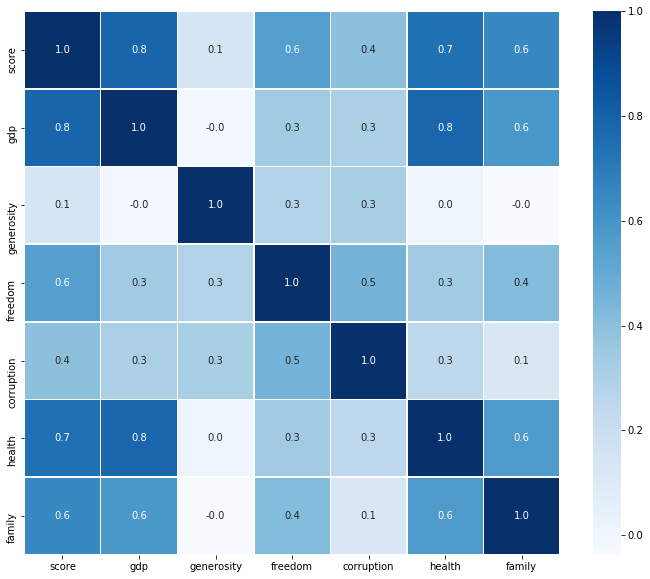

In [77]:
#correlation map  2015-2019

categories = ["score", "gdp", "generosity", "freedom", "corruption", "health", "family"]
fig, ax = plt.subplots(figsize= (12, 10))
sn.heatmap(main_data[categories].corr(), annot=True, cmap="Blues", linewidths=.5, fmt=".1f", ax=ax)
plt.show()

#the happiness score has a strong linear relationship with GDP and Family (Social Support, and health (healthy life expectancy
#the happiness score is least correlated with generosity

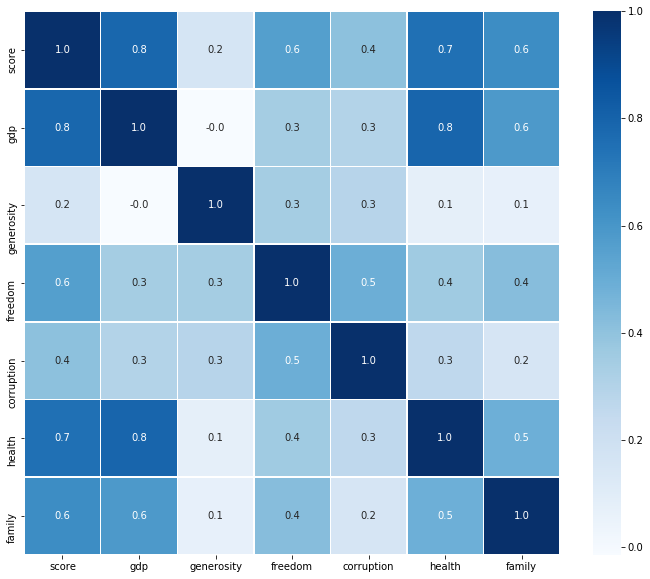

In [85]:
categories = ["score", "gdp", "generosity", "freedom", "corruption", "health", "family"]
fig, ax = plt.subplots(figsize= (12, 10))
sn.heatmap(dim_main_data[categories].corr(), annot=True, cmap="Blues", linewidths=.5, fmt=".1f", ax=ax)
plt.show()

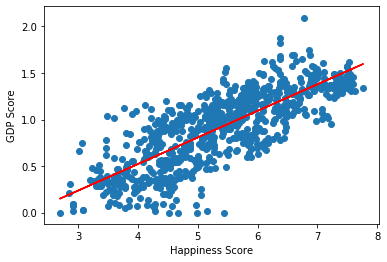

In [78]:
#since GDP seems to have the greatest correlation with the happiness score, lets look at a linear regresion of the two





linear_regression.fit(x,y)

plt.scatter(main_data["score"], main_data["gdp"])
y_head = linear_regression.predict(x)
plt.plot(x, y_head, color = "red")
plt.xlabel("Happiness Score")
plt.ylabel("GDP Score")

plt.show()




In [79]:
#correlation coefficient computation

score = main_data.iloc[:, 2]
gdp = main_data.iloc[:, 3]
correlation = st.pearsonr(score, gdp)
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.show()

The correlation between both factors is 0.79


In [43]:
main_data.head()

,country,rank,score,gdp,family,health,freedom,corruption,generosity,dystopia,year
0,switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
